# Description

It takes a GWAS that was imputed and postprocessed (using the PrediXcan scripts here https://github.com/hakyimlab/summary-gwas-imputation) on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

# Modules

In [6]:
# Install required packages if not already installed
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("qqman")) install.packages("qqman")
library(tidyverse)
library(qqman)

Loading required package: qqman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘qqman’”


also installing the dependency ‘calibrate’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [3]:
GLS_NULL_SIMS_DIR <- Sys.getenv("PHENOPLIER_NULLSIM_RESULTS_DIR")

In [4]:
GLS_NULL_SIMS_DIR

[1] "/tmp/phenoplier/results/gls/gwas/null_sims/ukb"

In [5]:
GWAS_DIR <- file.path(GLS_NULL_SIMS_DIR, "post_imputed_gwas")

In [6]:
GWAS_DIR

[1] "/opt/data/results/gls/null_sims/final_imputed_gwas"

# Random pheno 0

## Load data

In [7]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno0000.glm-imputed.txt.gz")))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_logical()
)



In [8]:
dim(gwas)

[1] 7990523      15

In [9]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.17766990,312,0.017301734,0.9861959,NA,NA,imputed,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.01165049,312,-0.030697466,0.9755108,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.12233010,312,-0.003500645,0.9972069,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.02621359,312,-0.002746337,0.9978087,NA,NA,imputed,NA
5,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.02135922,312,0.001480913,0.9988184,NA,NA,imputed,NA
6,rs564223368,chr1_630607_C_T_b38,chr1,630607,T,C,hg38,0.01165049,312,-0.082523883,0.9342301,NA,NA,imputed,NA


### Extract chromosome

In [10]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [11]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [12]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Manhattan plot

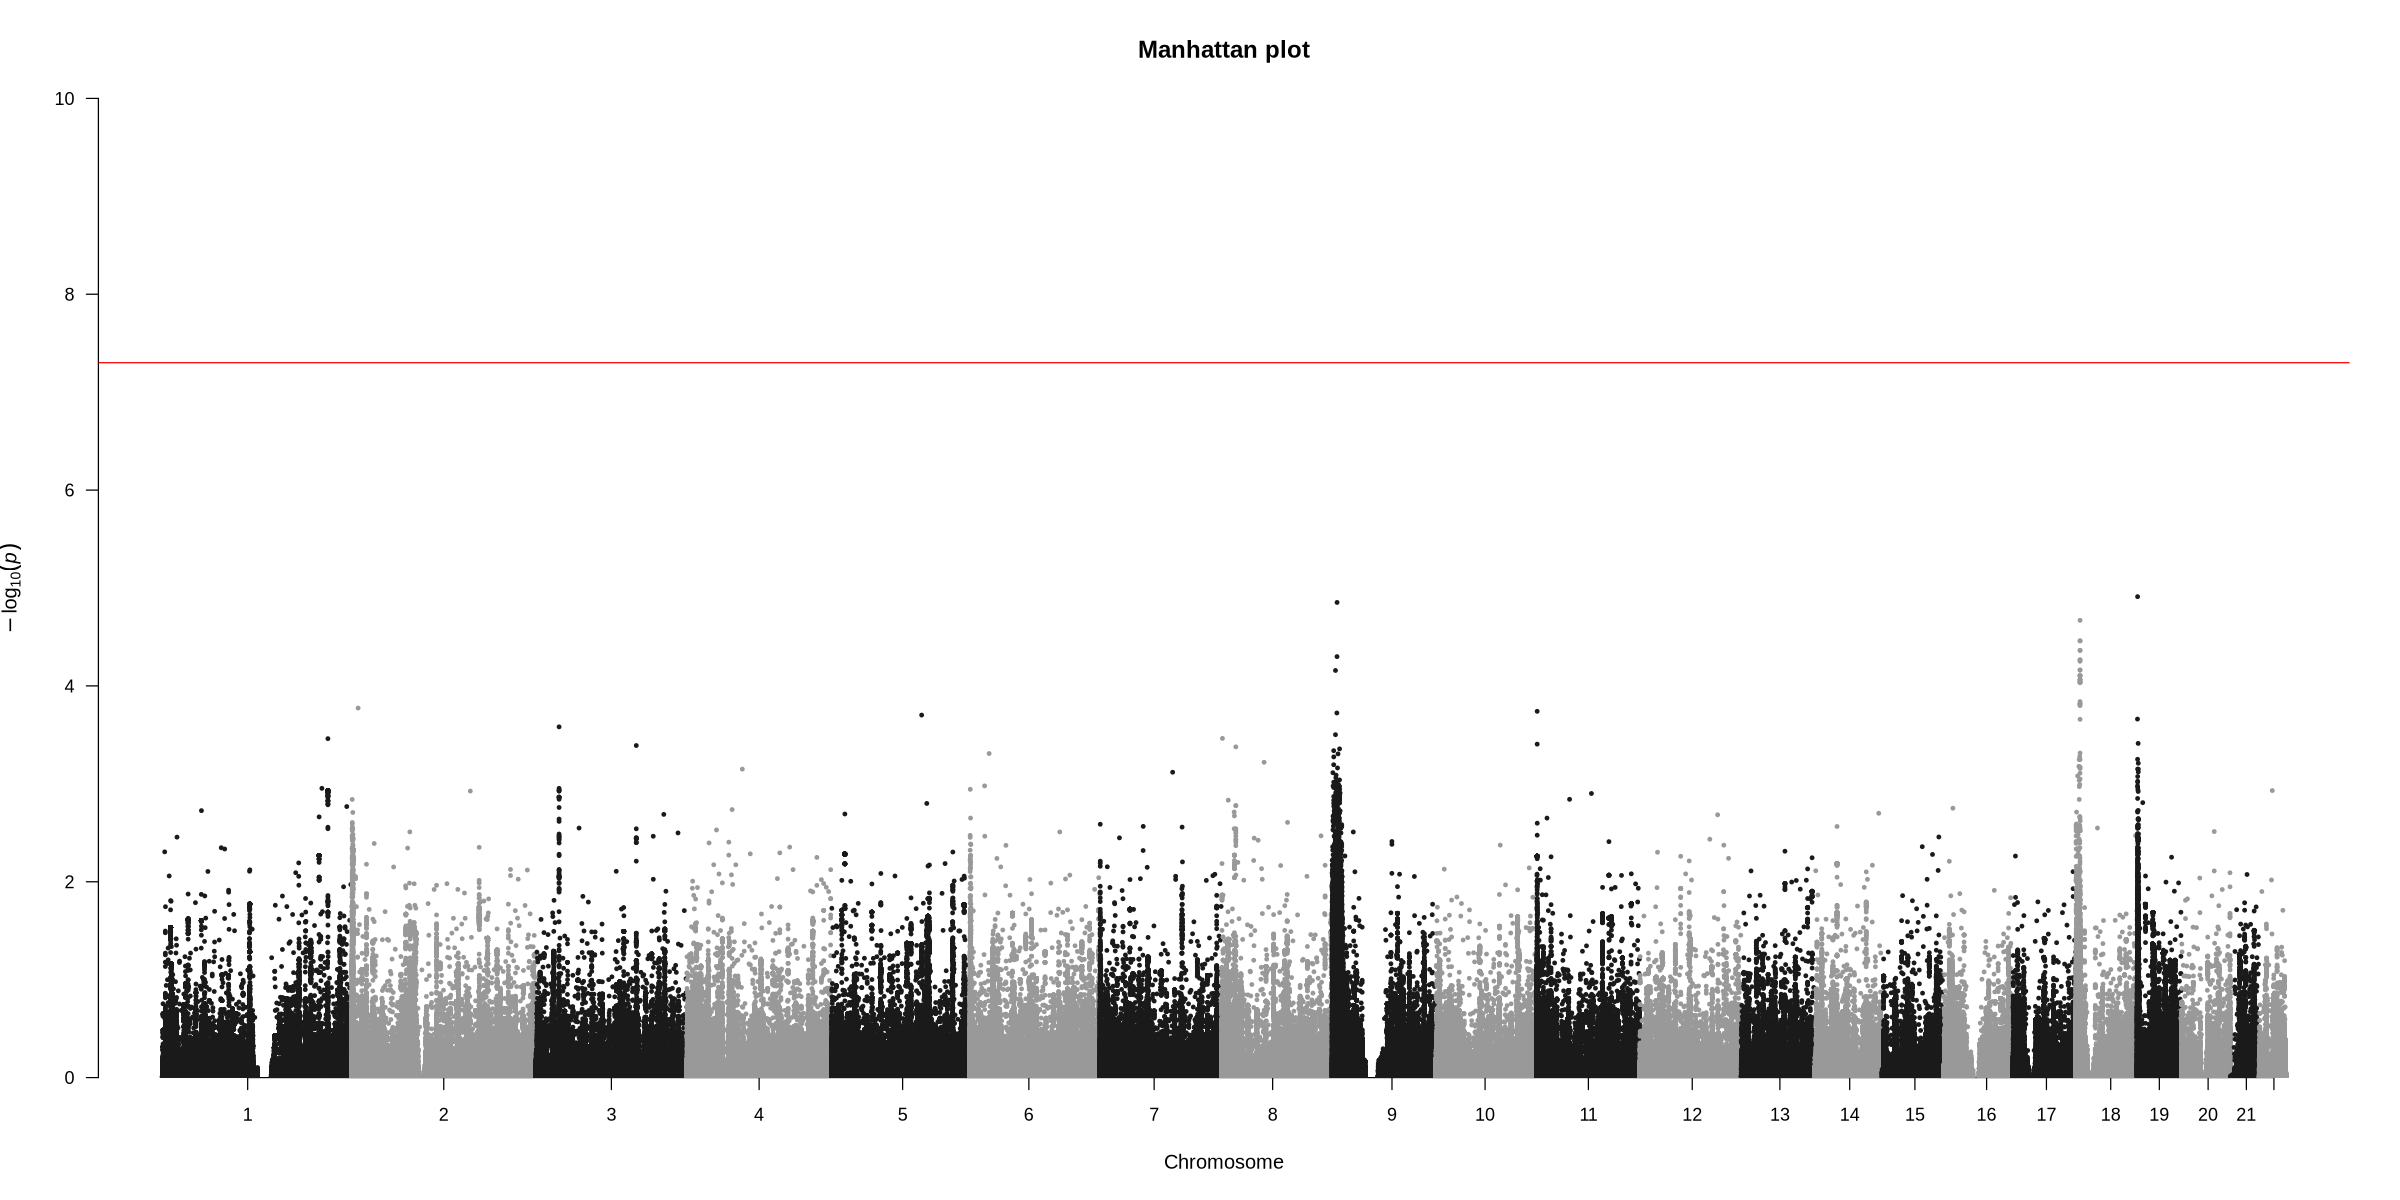

In [13]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = "Manhattan plot",
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
  ylim = c(0, 10),
)

## QQ-plot

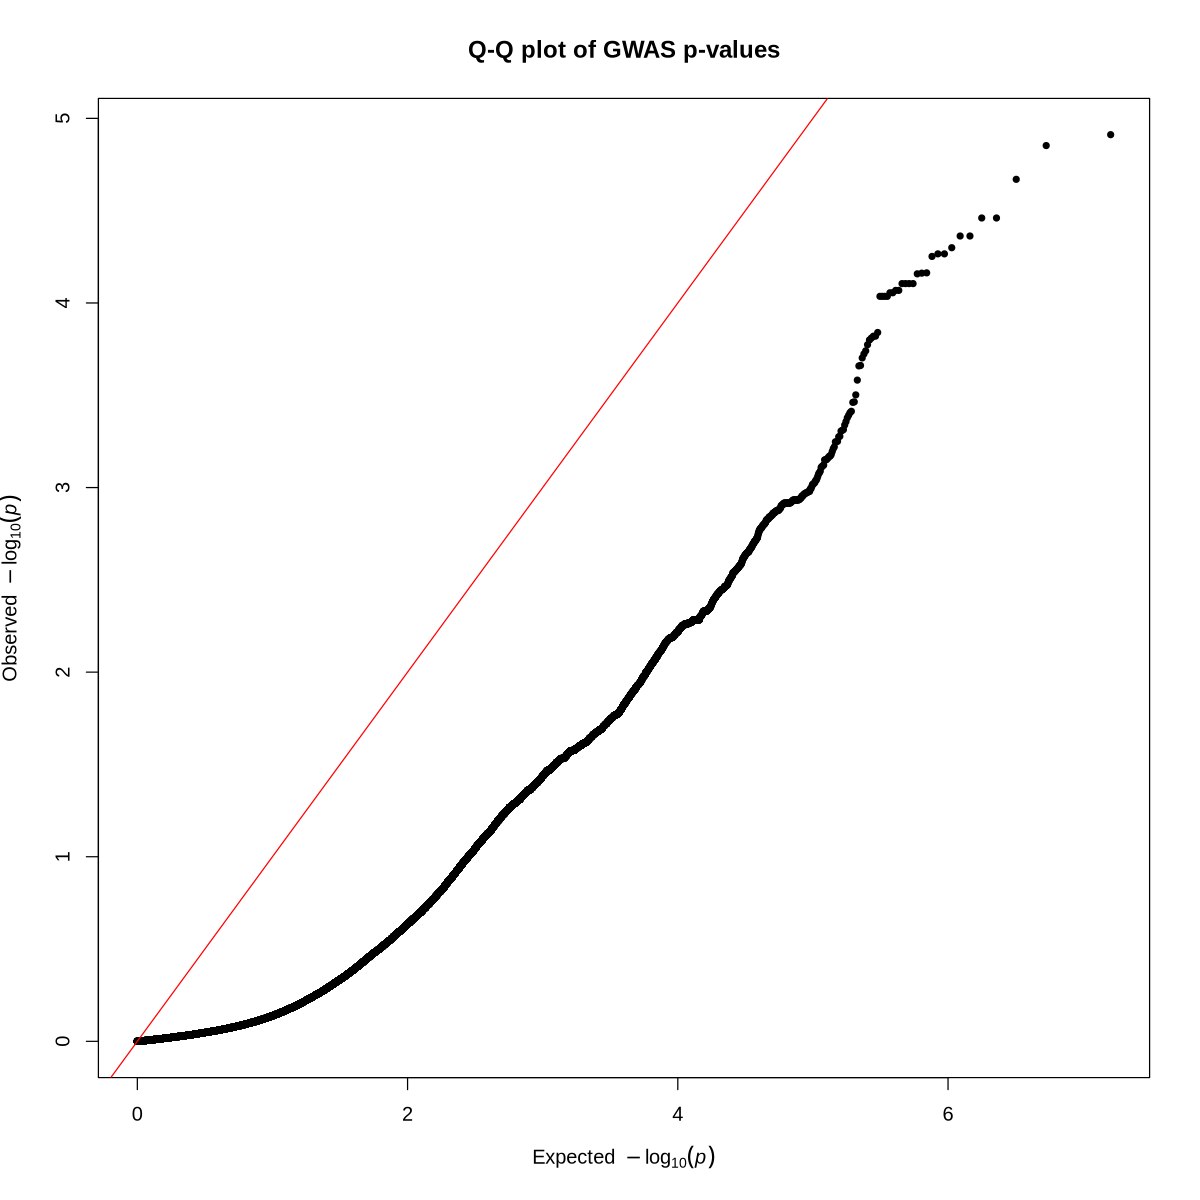

In [14]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(gwas$pvalue, main = "Q-Q plot of GWAS p-values")

# Random pheno 373

## Load data

In [15]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno373.glm-imputed.txt.gz")))


── Column specification ────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_logical()
)



In [16]:
dim(gwas)

[1] 8351200      15

In [17]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.17766990,312,0.3562117,0.7216820,0.0369988,0.103766,original,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.01165049,312,0.8468609,0.3970727,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.12233010,312,-0.9648698,0.3346100,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.02621359,312,0.4416943,0.6587104,NA,NA,imputed,NA
5,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.02135922,312,0.6737422,0.5004752,NA,NA,imputed,NA
6,rs564223368,chr1_630607_C_T_b38,chr1,630607,T,C,hg38,0.01165049,312,-0.2269625,0.8204529,NA,NA,imputed,NA


### Extract chromosome

In [18]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [19]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [20]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Manhattan plot

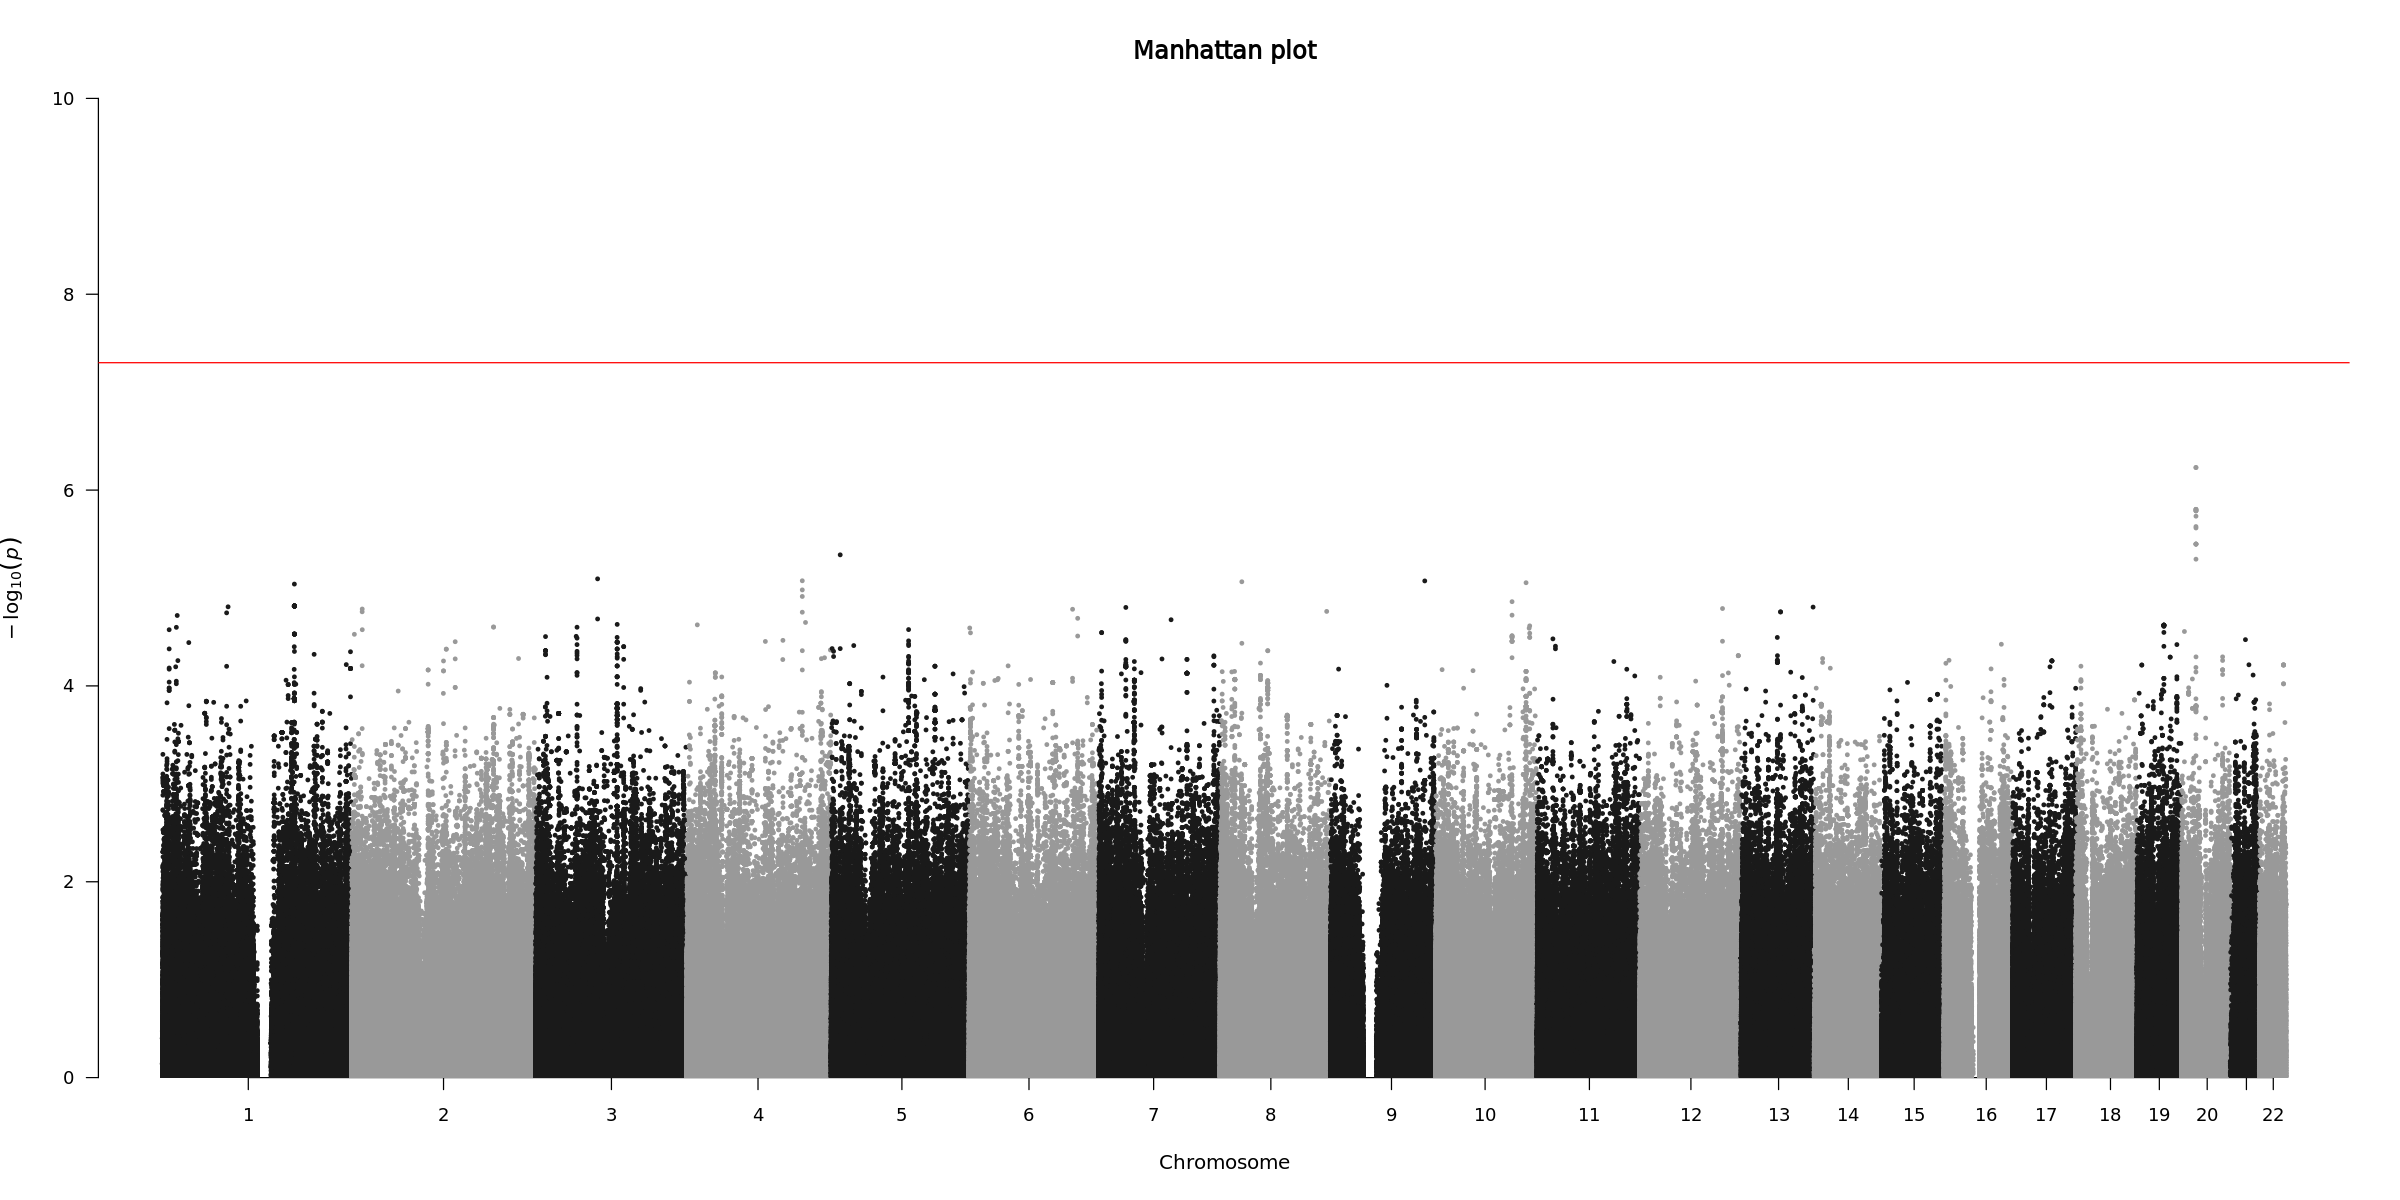

In [21]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = "Manhattan plot",
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
  ylim = c(0, 10),
)

## QQ-plot

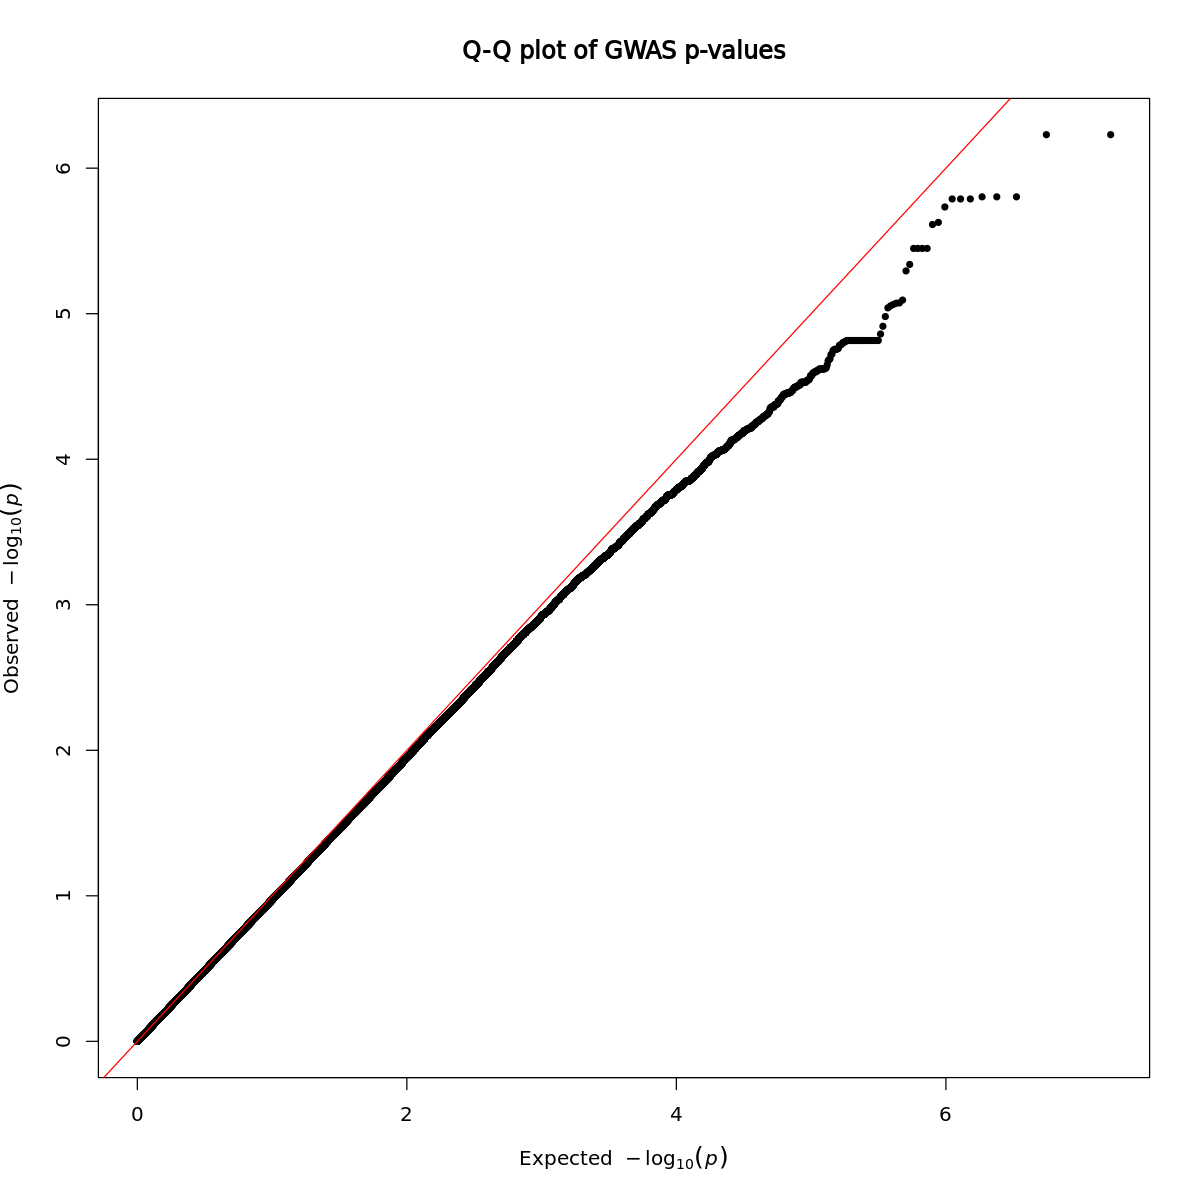

In [22]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(gwas$pvalue, main = "Q-Q plot of GWAS p-values")

# Random pheno 622

## Load data

In [23]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno622.glm-imputed.txt.gz")))


── Column specification ────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_logical()
)



In [24]:
dim(gwas)

[1] 8343246      15

In [25]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.17766990,312,0.1543243,0.8773540,0.0182168,0.117938,original,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.01165049,312,0.5740969,0.5659023,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.12233010,312,-0.5496831,0.5825367,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.02621359,312,0.6357373,0.5249476,NA,NA,imputed,NA
5,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.02135922,312,0.7002995,0.4837403,NA,NA,imputed,NA
6,rs564223368,chr1_630607_C_T_b38,chr1,630607,T,C,hg38,0.01165049,312,-1.4579248,0.1448613,NA,NA,imputed,NA


### Extract chromosome

In [26]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [27]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [28]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Manhattan plot

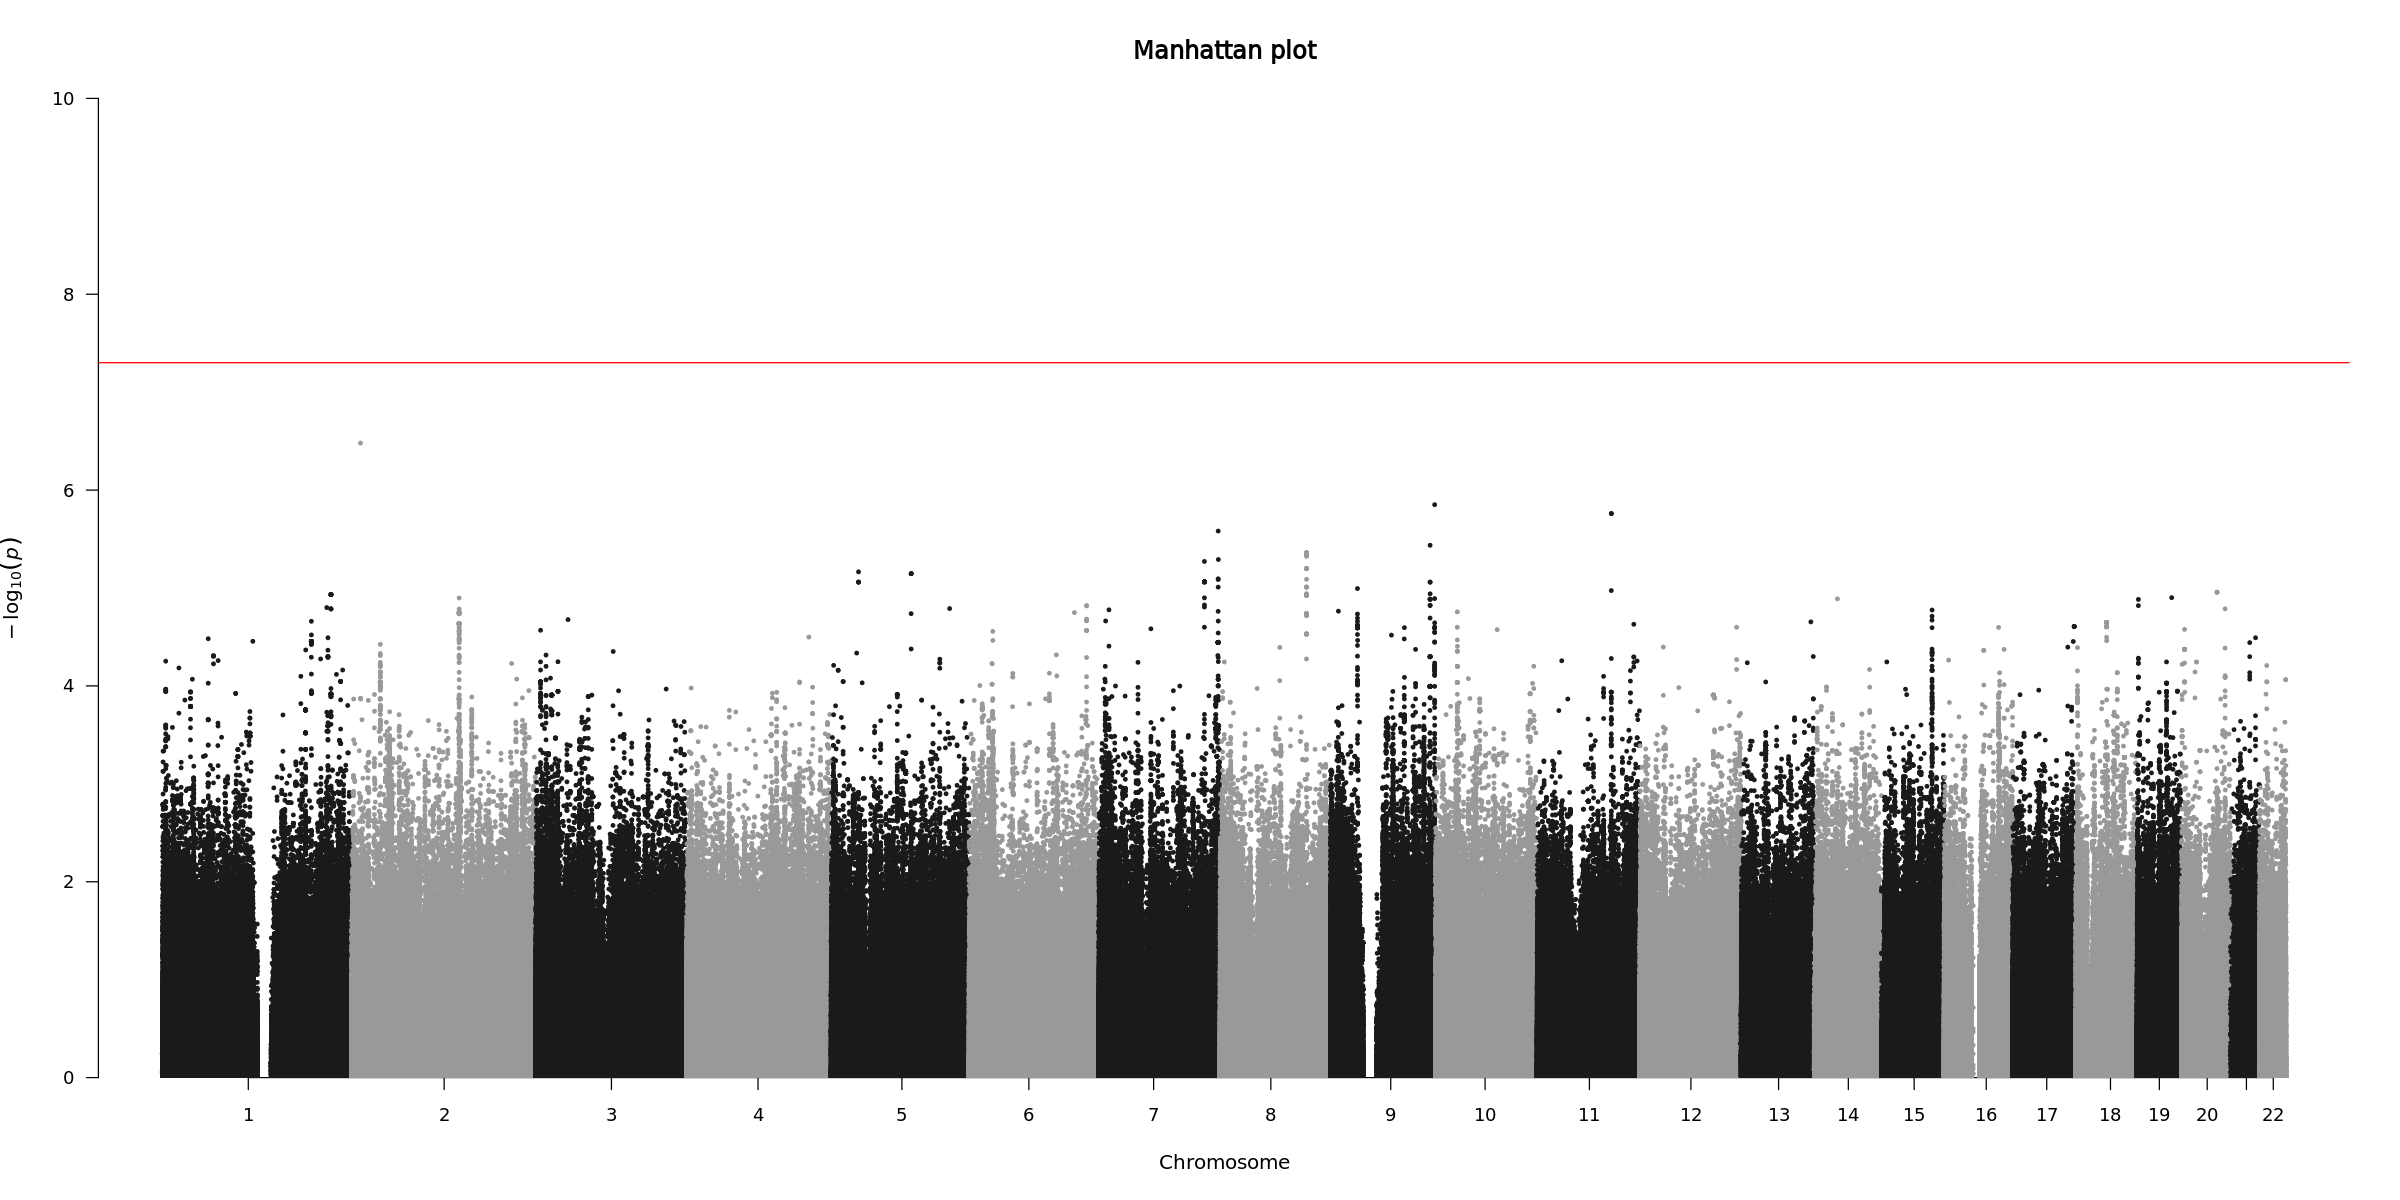

In [29]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = "Manhattan plot",
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
  ylim = c(0, 10),
)

## QQ-plot

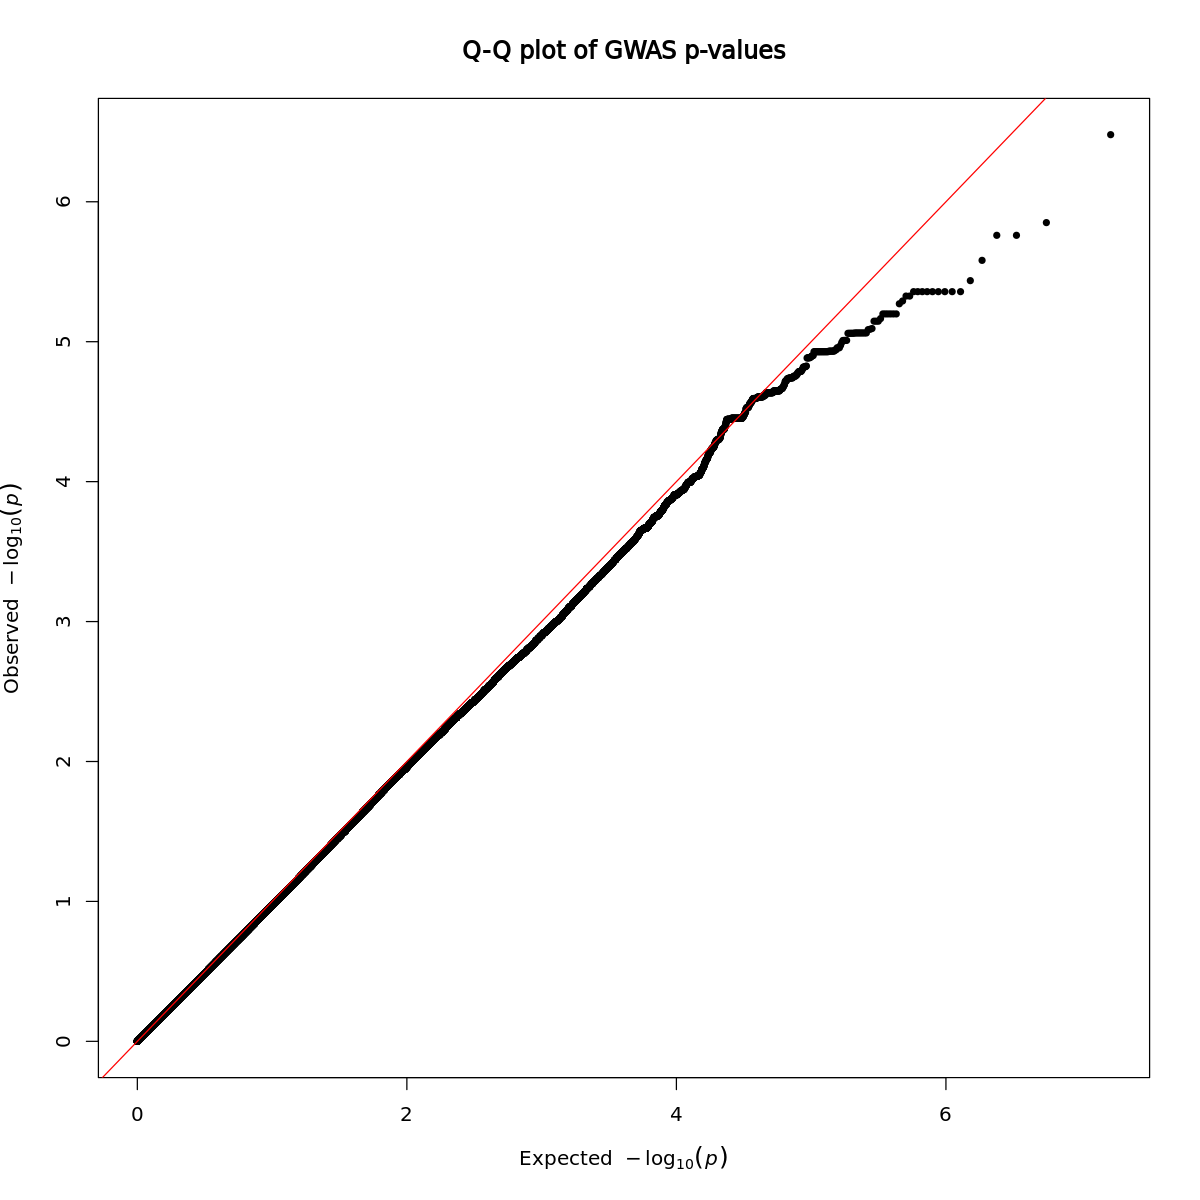

In [30]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(gwas$pvalue, main = "Q-Q plot of GWAS p-values")

# Random pheno 825

## Load data

In [31]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno825.glm-imputed.txt.gz")))


── Column specification ────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_logical()
)



In [32]:
dim(gwas)

[1] 8342021      15

In [33]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.17766990,312,0.9063247,0.3647640,0.0961361,0.105905,original,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.01165049,312,0.5041921,0.6141264,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.12233010,312,-0.1839861,0.8540244,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.02621359,312,0.8329428,0.4048770,NA,NA,imputed,NA
5,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.02135922,312,1.0280828,0.3039109,NA,NA,imputed,NA
6,rs564223368,chr1_630607_C_T_b38,chr1,630607,T,C,hg38,0.01165049,312,0.2383223,0.8116311,NA,NA,imputed,NA


### Extract chromosome

In [34]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [35]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [36]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Manhattan plot

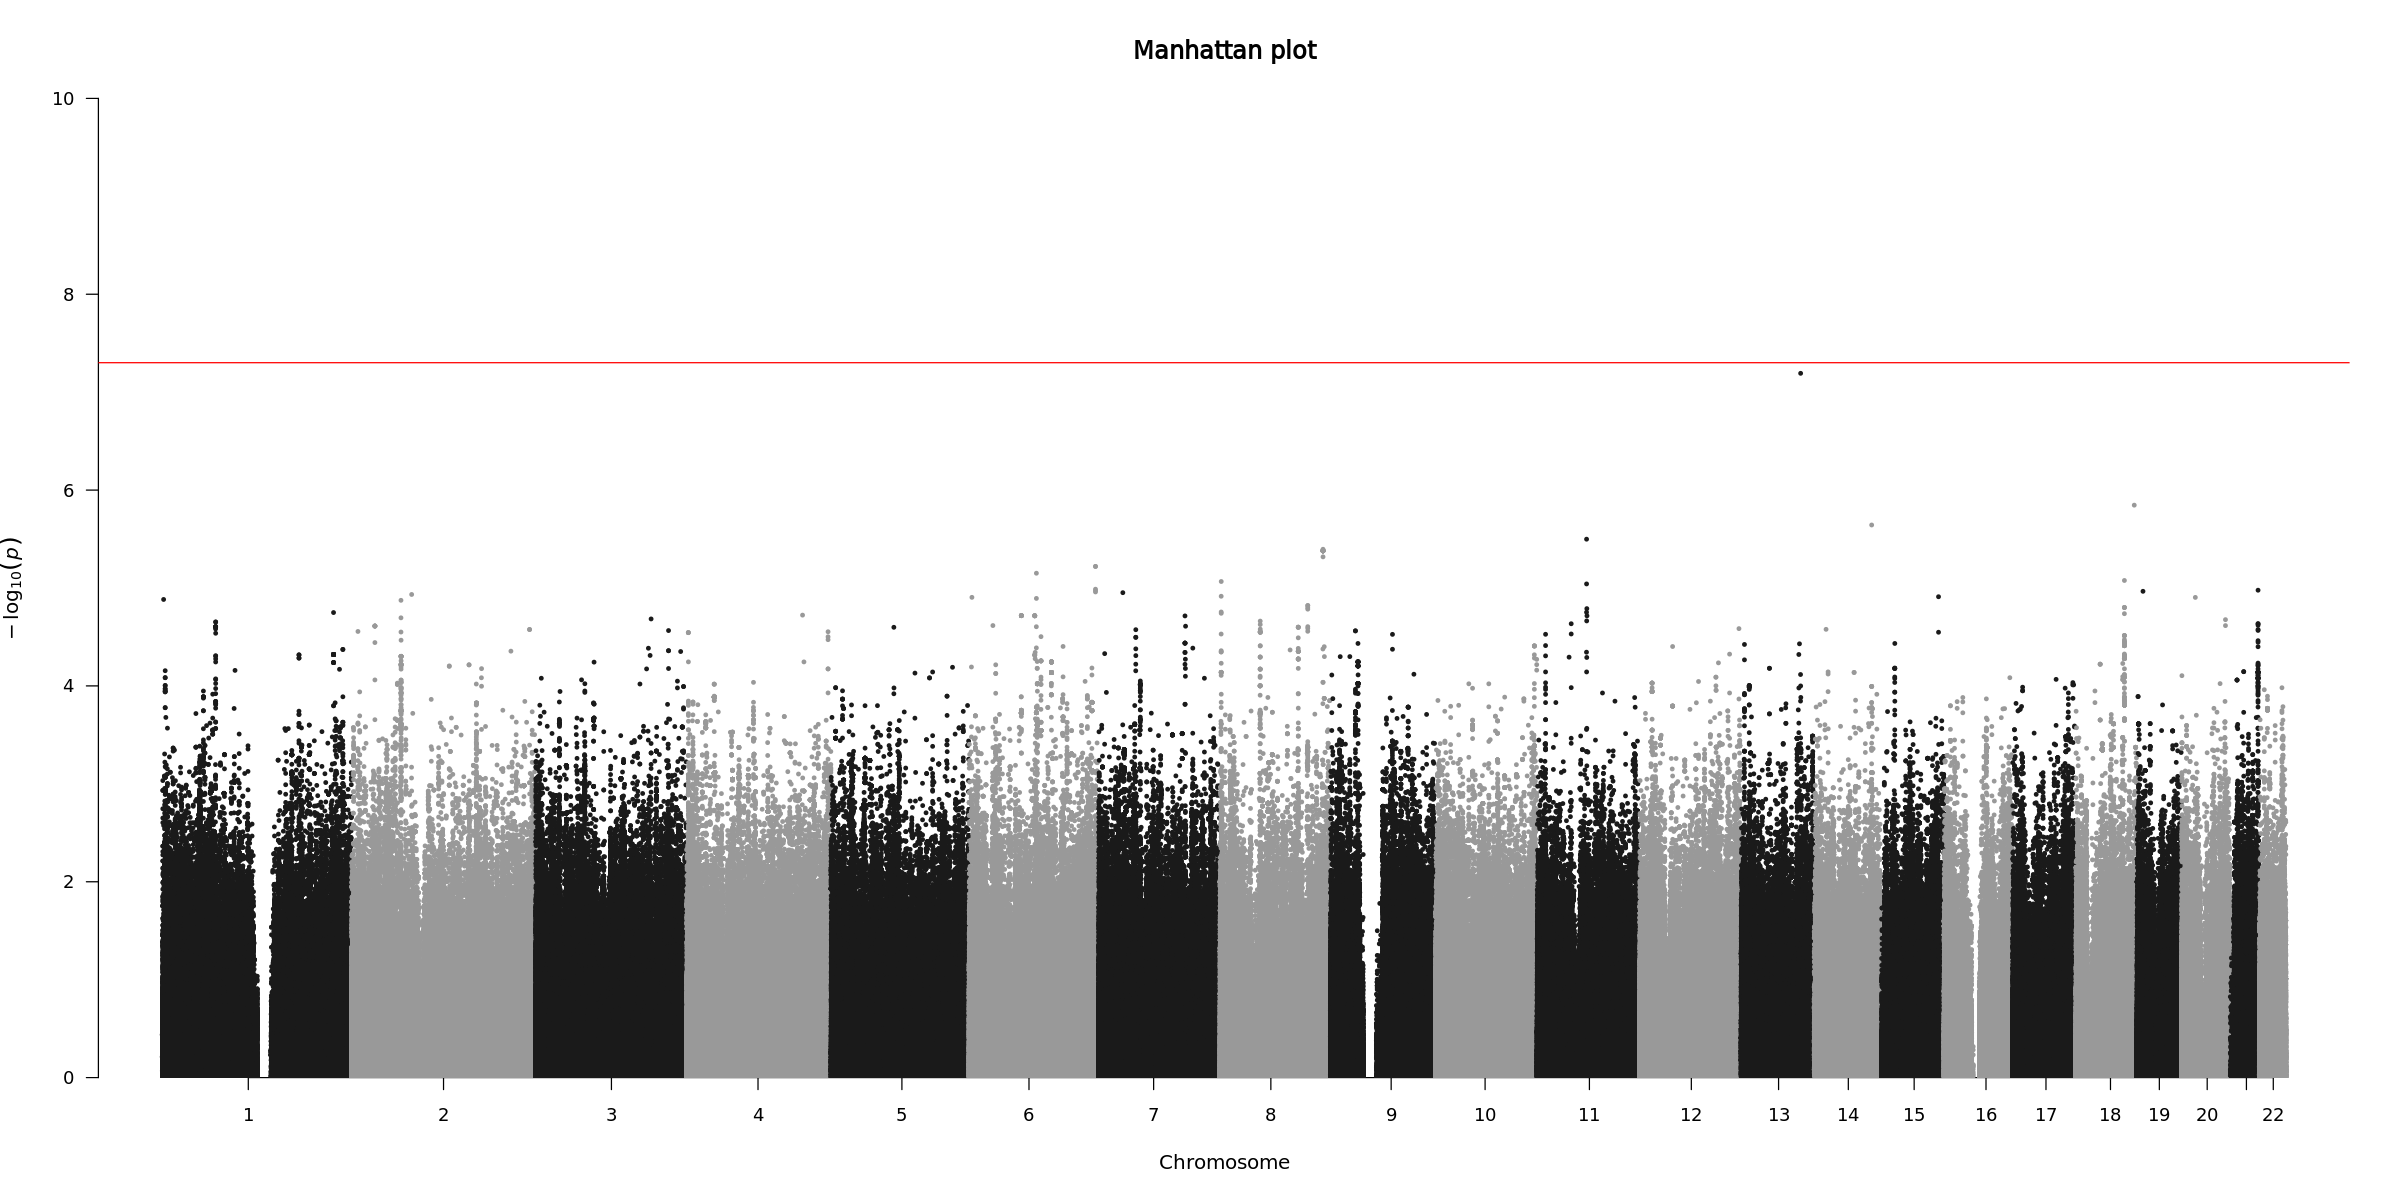

In [37]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = "Manhattan plot",
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
  ylim = c(0, 10),
)

## QQ-plot

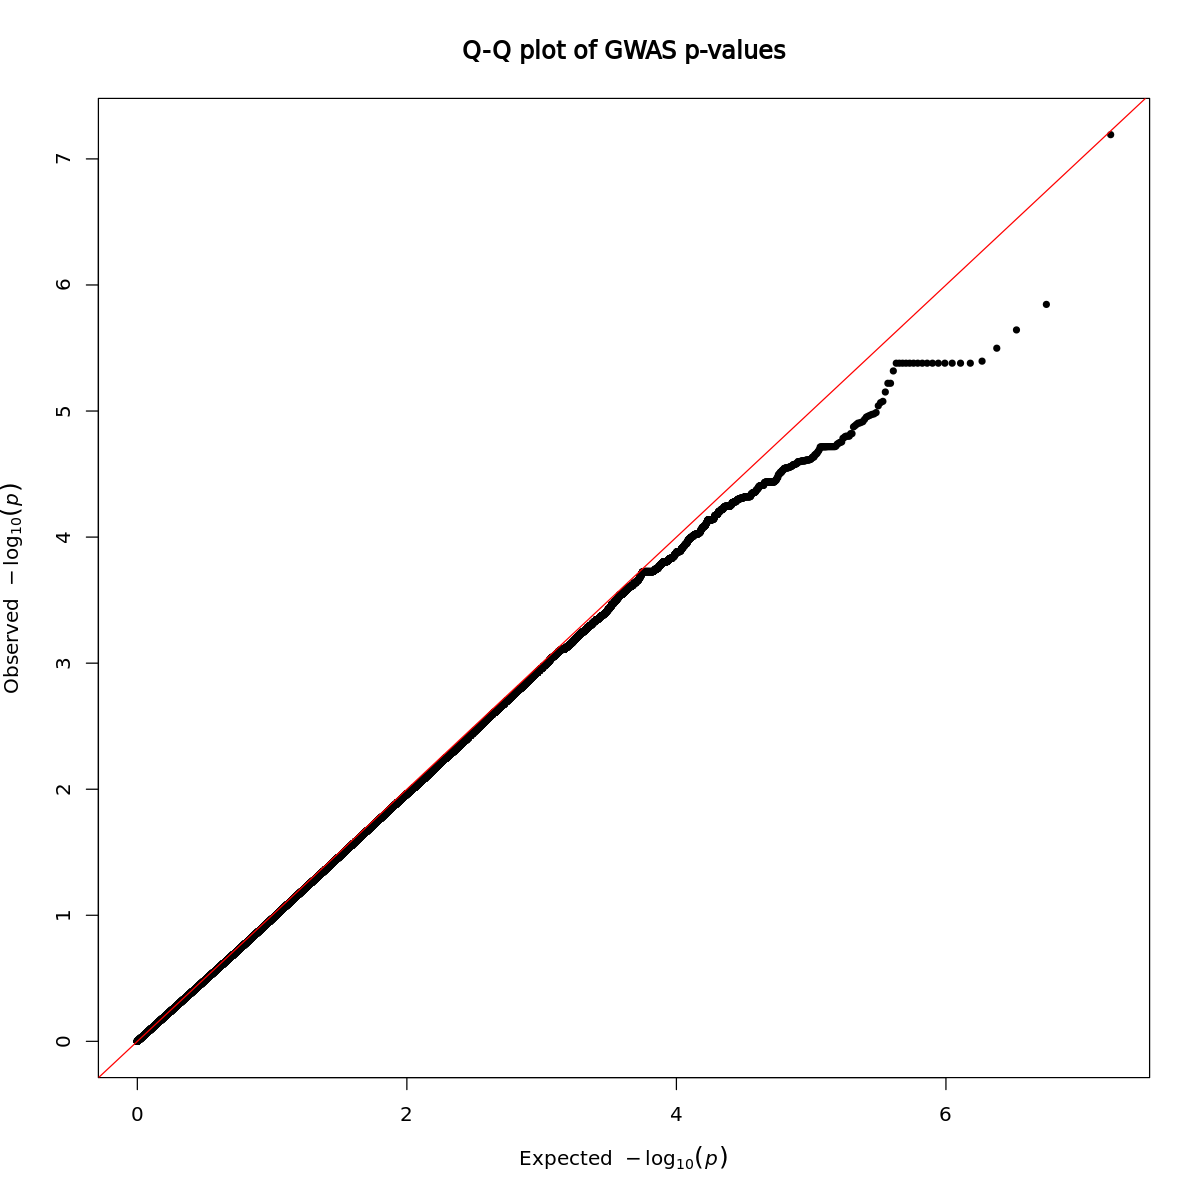

In [38]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(gwas$pvalue, main = "Q-Q plot of GWAS p-values")

# Random pheno 135

## Load data

In [ ]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno135.glm-imputed.txt.gz")))

In [ ]:
dim(gwas)

In [ ]:
head(gwas)

### Extract chromosome

In [ ]:
unique(gwas$chromosome)

In [ ]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [ ]:
unique(gwas$chrom)

## Manhattan plot

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = "Manhattan plot",
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
  ylim = c(0, 10),
)

## QQ-plot

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(gwas$pvalue, main = "Q-Q plot of GWAS p-values")

# Random pheno 412

## Load data

In [ ]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno412.glm-imputed.txt.gz")))

In [ ]:
dim(gwas)

In [ ]:
head(gwas)

### Extract chromosome

In [ ]:
unique(gwas$chromosome)

In [ ]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [ ]:
unique(gwas$chrom)

## Manhattan plot

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = "Manhattan plot",
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
  ylim = c(0, 10),
)

## QQ-plot

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(gwas$pvalue, main = "Q-Q plot of GWAS p-values")